In [1]:
#script per il testing di dataset_emtropy sul dataset corrente
import pandas as pd
import numpy as np 
import math
df = pd.read_csv("../DatasetClientClustering.csv", 
                 engine='c', 
                 sep=',', 
                 encoding='latin-1')
df = df.drop(df.columns[list(np.arange(8))], axis=1)
df = df.drop(columns=["ClientID", "Prov", "ClientDateStart", "AuM"])

In [11]:
#distanza fra due righe del dataframe
row1 = df.iloc[3]
row2 = df.iloc[5]
print(np.linalg.norm(row1 - row2))

def dist_measure(x1, x2):
    return np.linalg.norm(x1- x2)

5.850377914779357


In [44]:
#matrice delle distanze
#distanza fra due righe del dataframe
def dist_matrix(df):
    df = df.reset_index(drop = True)
    MATRIX = [
        [
            dist_measure(row1, row2) 
            for index1, row1 in df.iterrows()
        ]
        for index2, row2 in df.iterrows()
    ]
    return MATRIX
dist = np.matrix( dist_matrix( df.sample(10)))

In [88]:
#definisco una funzione che data una una matrice delle distanze definisce una matrice delle
#similarità, con misura esponenziale
def sim_matrix(dist_matrix):
    #calcolo di alpha 
    alpha = -math.log(0.5) / np.matrix.mean(dist_matrix)
    #funzione per calcolo della similarità dalla distanza
    def sim(dist_value, alpha):
        return math.exp(-alpha * dist_value)
    vsim = np.vectorize(sim)
    #sostituisco ogni elemento della matrice con la similarità
    MATRIX = vsim(dist_matrix, alpha)
    return MATRIX
simp = sim_matrix(dist)
simp

matrix([[1.        , 0.57717214, 0.7450751 , 0.26120699, 0.30901759,
         0.51455044, 0.63526537, 0.5219796 , 0.4901882 , 0.62467662],
        [0.57717214, 1.        , 0.53272737, 0.43879825, 0.50508457,
         0.31532535, 0.78788364, 0.87186029, 0.83864958, 0.40302924],
        [0.7450751 , 0.53272737, 1.        , 0.23749933, 0.27478581,
         0.57764736, 0.62663747, 0.48685536, 0.45893061, 0.74903003],
        [0.26120699, 0.43879825, 0.23749933, 1.        , 0.81520559,
         0.14251528, 0.35697973, 0.46818993, 0.51465316, 0.1809439 ],
        [0.30901759, 0.50508457, 0.27478581, 0.81520559, 1.        ,
         0.1673427 , 0.4045283 , 0.52765665, 0.58401477, 0.21029025],
        [0.51455044, 0.31532535, 0.57764736, 0.14251528, 0.1673427 ,
         1.        , 0.36622483, 0.28620209, 0.27162482, 0.75240918],
        [0.63526537, 0.78788364, 0.62663747, 0.35697973, 0.4045283 ,
         0.36622483, 1.        , 0.75717559, 0.68565475, 0.47464376],
        [0.5219796 , 0.8718

In [122]:
#definisco una funzione che data una matrice di similarità calcola l'entropia del dataset
def dataset_entropy(sim_matrix):
    #funzione per trasformare valori di similarità in valori di entropia
    def sim_to_entropy(sv):
        if sv != 1:
            sv = (sv * math.log2(sv)) + ((1-sv)*math.log2(1-sv))
            return sv
        else:
            return float('nan')
    entropies = [sim_to_entropy(x) for x in np.nditer(sim_matrix)]
    return np.nansum(entropies)/2
dataset_entropy(simp)

-39.47384017867732

In [116]:
def sim_to_entropy(sv):
        if sv != 1:
            sv = (sv * math.log2(sv)) + ((1-sv)*math.log2(1-sv))
        else:
            sv = 0
        print(sv)
        return(sv)

for i in np.nditer(simp):
    print(i)

1.0
0.5771721370872664
0.7450750981320657
0.26120699338650494
0.3090175876499527
0.5145504366767442
0.6352653668864211
0.5219795955085119
0.4901882036981718
0.6246766173256253
0.5771721370872664
1.0
0.5327273734122255
0.43879824596405187
0.5050845684606289
0.315325352331012
0.7878836434918319
0.8718602934512781
0.8386495755593573
0.40302924212189006
0.7450750981320657
0.5327273734122255
1.0
0.2374993324659334
0.27478580695684185
0.5776473591494968
0.626637469653655
0.4868553648338569
0.45893061388998635
0.749030025122585
0.26120699338650494
0.43879824596405187
0.2374993324659334
1.0
0.8152055923075221
0.14251527815148465
0.3569797284359603
0.4681899317611342
0.5146531574943836
0.18094389635558528
0.3090175876499527
0.5050845684606289
0.27478580695684185
0.8152055923075221
1.0
0.16734270220850625
0.40452829863651085
0.5276566512212233
0.58401477231922
0.210290245757699
0.5145504366767442
0.315325352331012
0.5776473591494968
0.14251527815148465
0.16734270220850625
1.0
0.3662248252292247


In [2]:
import os 
path = "/home/davidebadalotti/DATA-SCIENCE-1/data-science-lab/advise_only/class_scripts/"
os.chdir(path)
from entropy_selection_class import *

In [6]:
First_test = feature_ranking(df.sample(10))
First_test.dist_matrix()
First_test.set_alpha()
First_test.sim_matrix()
First_test.simmatrix_entropy()
First_test.E

-41.121448013396204

In [11]:
Second_test = feature_ranking(df.sample(10))
Second_test.complete()
list(df.columns)

['RiskPropension',
 'PortfolioRisk',
 'ClientInvestmentHorizon',
 'PortfolioHorizon',
 'ClientKnowledgeExperience',
 'ClientPotentialIndex',
 'IncomeHighLow',
 'Sex',
 'Age',
 'IncomeNeed',
 'LongTermCareNeed',
 'ProtectionNeed',
 'PensionNeed',
 'InheritanceIndex',
 'PanicMood',
 'NoTrustInBanks',
 'BondInvestments',
 'EquityInvestments',
 'MoneyMarketInvestments',
 'OtherInvestments',
 'Cash']

In [3]:
from entropy_selection_class import dataframe_ext
from entropy_RANK import RANK
from entropy_RANK import SRANK
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
dataframe = df.sample(10)
SRANK(df)


SAMPLE:  0
	 features: 
		 RiskPropension
		 PortfolioRisk
		 ClientInvestmentHorizon
		 PortfolioHorizon
		 ClientKnowledgeExperience
		 ClientPotentialIndex
		 IncomeHighLow
		 Sex
		 Age
		 IncomeNeed
		 LongTermCareNeed
		 ProtectionNeed
		 PensionNeed
		 InheritanceIndex
		 PanicMood
		 NoTrustInBanks
		 BondInvestments
		 EquityInvestments
		 MoneyMarketInvestments
		 OtherInvestments
		 Cash
SAMPLE:  1
	 features: 
		 RiskPropension
		 PortfolioRisk
		 ClientInvestmentHorizon
		 PortfolioHorizon
		 ClientKnowledgeExperience
		 ClientPotentialIndex
		 IncomeHighLow
		 Sex
		 Age
		 IncomeNeed
		 LongTermCareNeed
		 ProtectionNeed
		 PensionNeed
		 InheritanceIndex
		 PanicMood
		 NoTrustInBanks
		 BondInvestments
		 EquityInvestments
		 MoneyMarketInvestments
		 OtherInvestments
		 Cash
SAMPLE:  2
	 features: 
		 RiskPropension
		 PortfolioRisk
		 ClientInvestmentHorizon
		 PortfolioHorizon
		 ClientKnowledgeExperience
		 ClientPotentialIndex
		 IncomeHighLow
		 Sex
		 Age
		 Inc

,score_final
feature,
PanicMood,73
PortfolioRisk,71
MoneyMarketInvestments,70
OtherInvestments,64
RiskPropension,59
InheritanceIndex,52
ProtectionNeed,46
NoTrustInBanks,45
ClientKnowledgeExperience,43


In [7]:
N_SAMPLE = 4
SAMPLE_SIZE = 10
max_score = (len(df.columns)-1)*N_SAMPLE
scores = SRANK(df)

SAMPLE:  0
	 features: 
		 RiskPropension
		 PortfolioRisk
		 ClientInvestmentHorizon
		 PortfolioHorizon
		 ClientKnowledgeExperience
		 ClientPotentialIndex
		 IncomeHighLow
		 Sex
 Age
		 IncomeNeed
		 LongTermCareNeed
		 ProtectionNeed
		 PensionNeed
		 InheritanceIndex
		 PanicMood
		 NoTrustInBanks
		 BondInvestments
		 EquityInvestments
		 MoneyMarketInvestments
		 OtherInvestments
		 Cash
SAMPLE:  1
	 features: 
		 RiskPropension
		 PortfolioRisk
		 ClientInvestmentHorizon
		 PortfolioHorizon
		 ClientKnowledgeExperience
		 ClientPotentialIndex
		 IncomeHighLow
		 Sex
		 Age
		 IncomeNeed
		 LongTermCareNeed
		 ProtectionNeed
		 PensionNeed
		 InheritanceIndex
		 PanicMood
		 NoTrustInBanks
		 BondInvestments
		 EquityInvestments
		 MoneyMarketInvestments
		 OtherInvestments
		 Cash
SAMPLE:  2
	 features: 
		 RiskPropension
		 PortfolioRisk
		 ClientInvestmentHorizon
		 PortfolioHorizon
		 ClientKnowledgeExperience
		 ClientPotentialIndex
		 IncomeHighLow
		 Sex
		 Age
		 Incom

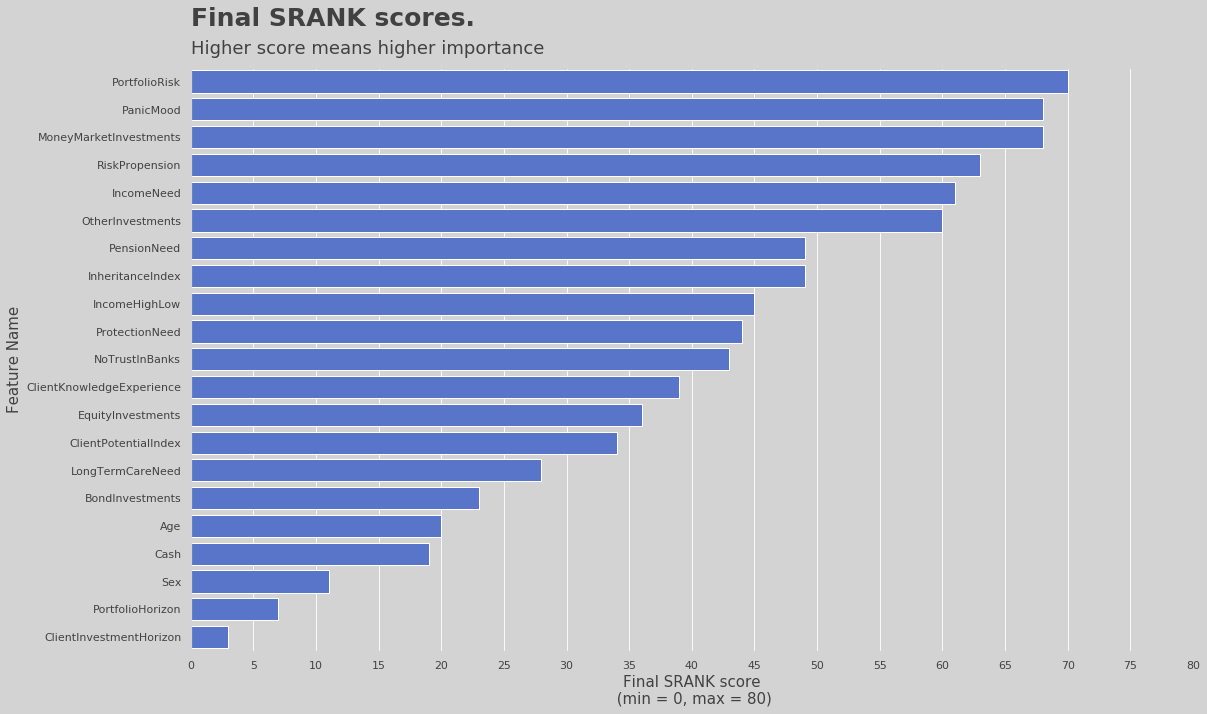

In [9]:
plt.figure(figsize = (16, 10))
mpl.style.use('fivethirtyeight')
sns.set(rc = {
                'axes.facecolor':'lightgray',
                'axes.edgecolor': 'lightgray',
                'figure.facecolor':'lightgray',
                'axes.labelcolor': '#414141',
                'text.color': '#414141',
                'xtick.color': '#414141',
                'ytick.color': '#414141',
                'grid.color': 'ghostwhite',
             })
chart = sns.barplot(x = "score_final",
                    y = "feature", 
                    data = scores.reset_index(), 
                    color = "royalblue", 
                    saturation = .7)

chart.set(xticks = [i for i in range(0, max_score+5, 5)])
chart.text(x = 0, y = -2, s="Final SRANK scores.", fontsize=25, fontweight='semibold', color='#414141')
chart.text(x = 0, y = -1, s="Higher score means higher importance", fontsize=18, fontweight='normal', color='#414141')
plt.xlabel("Final SRANK score\n (min = 0, max = {})".format(max_score), fontsize = 15, color='#414141')
plt.ylabel("Feature Name", fontsize = 15, color='#414141')
plt.show()

In [86]:
[i for i in range(0, max_score, 5)]

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]